In [2]:
import os
import cv2
import util
from util import get_car, read_license_plate, write_csv

from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

current_working_directory = os.getcwd()
print(current_working_directory)

Using CPU. Note: This module is much faster with a GPU.


C:\Users\MAT-Admin\Automatic-License-Plate-Recognition-using-YOLOv8-main


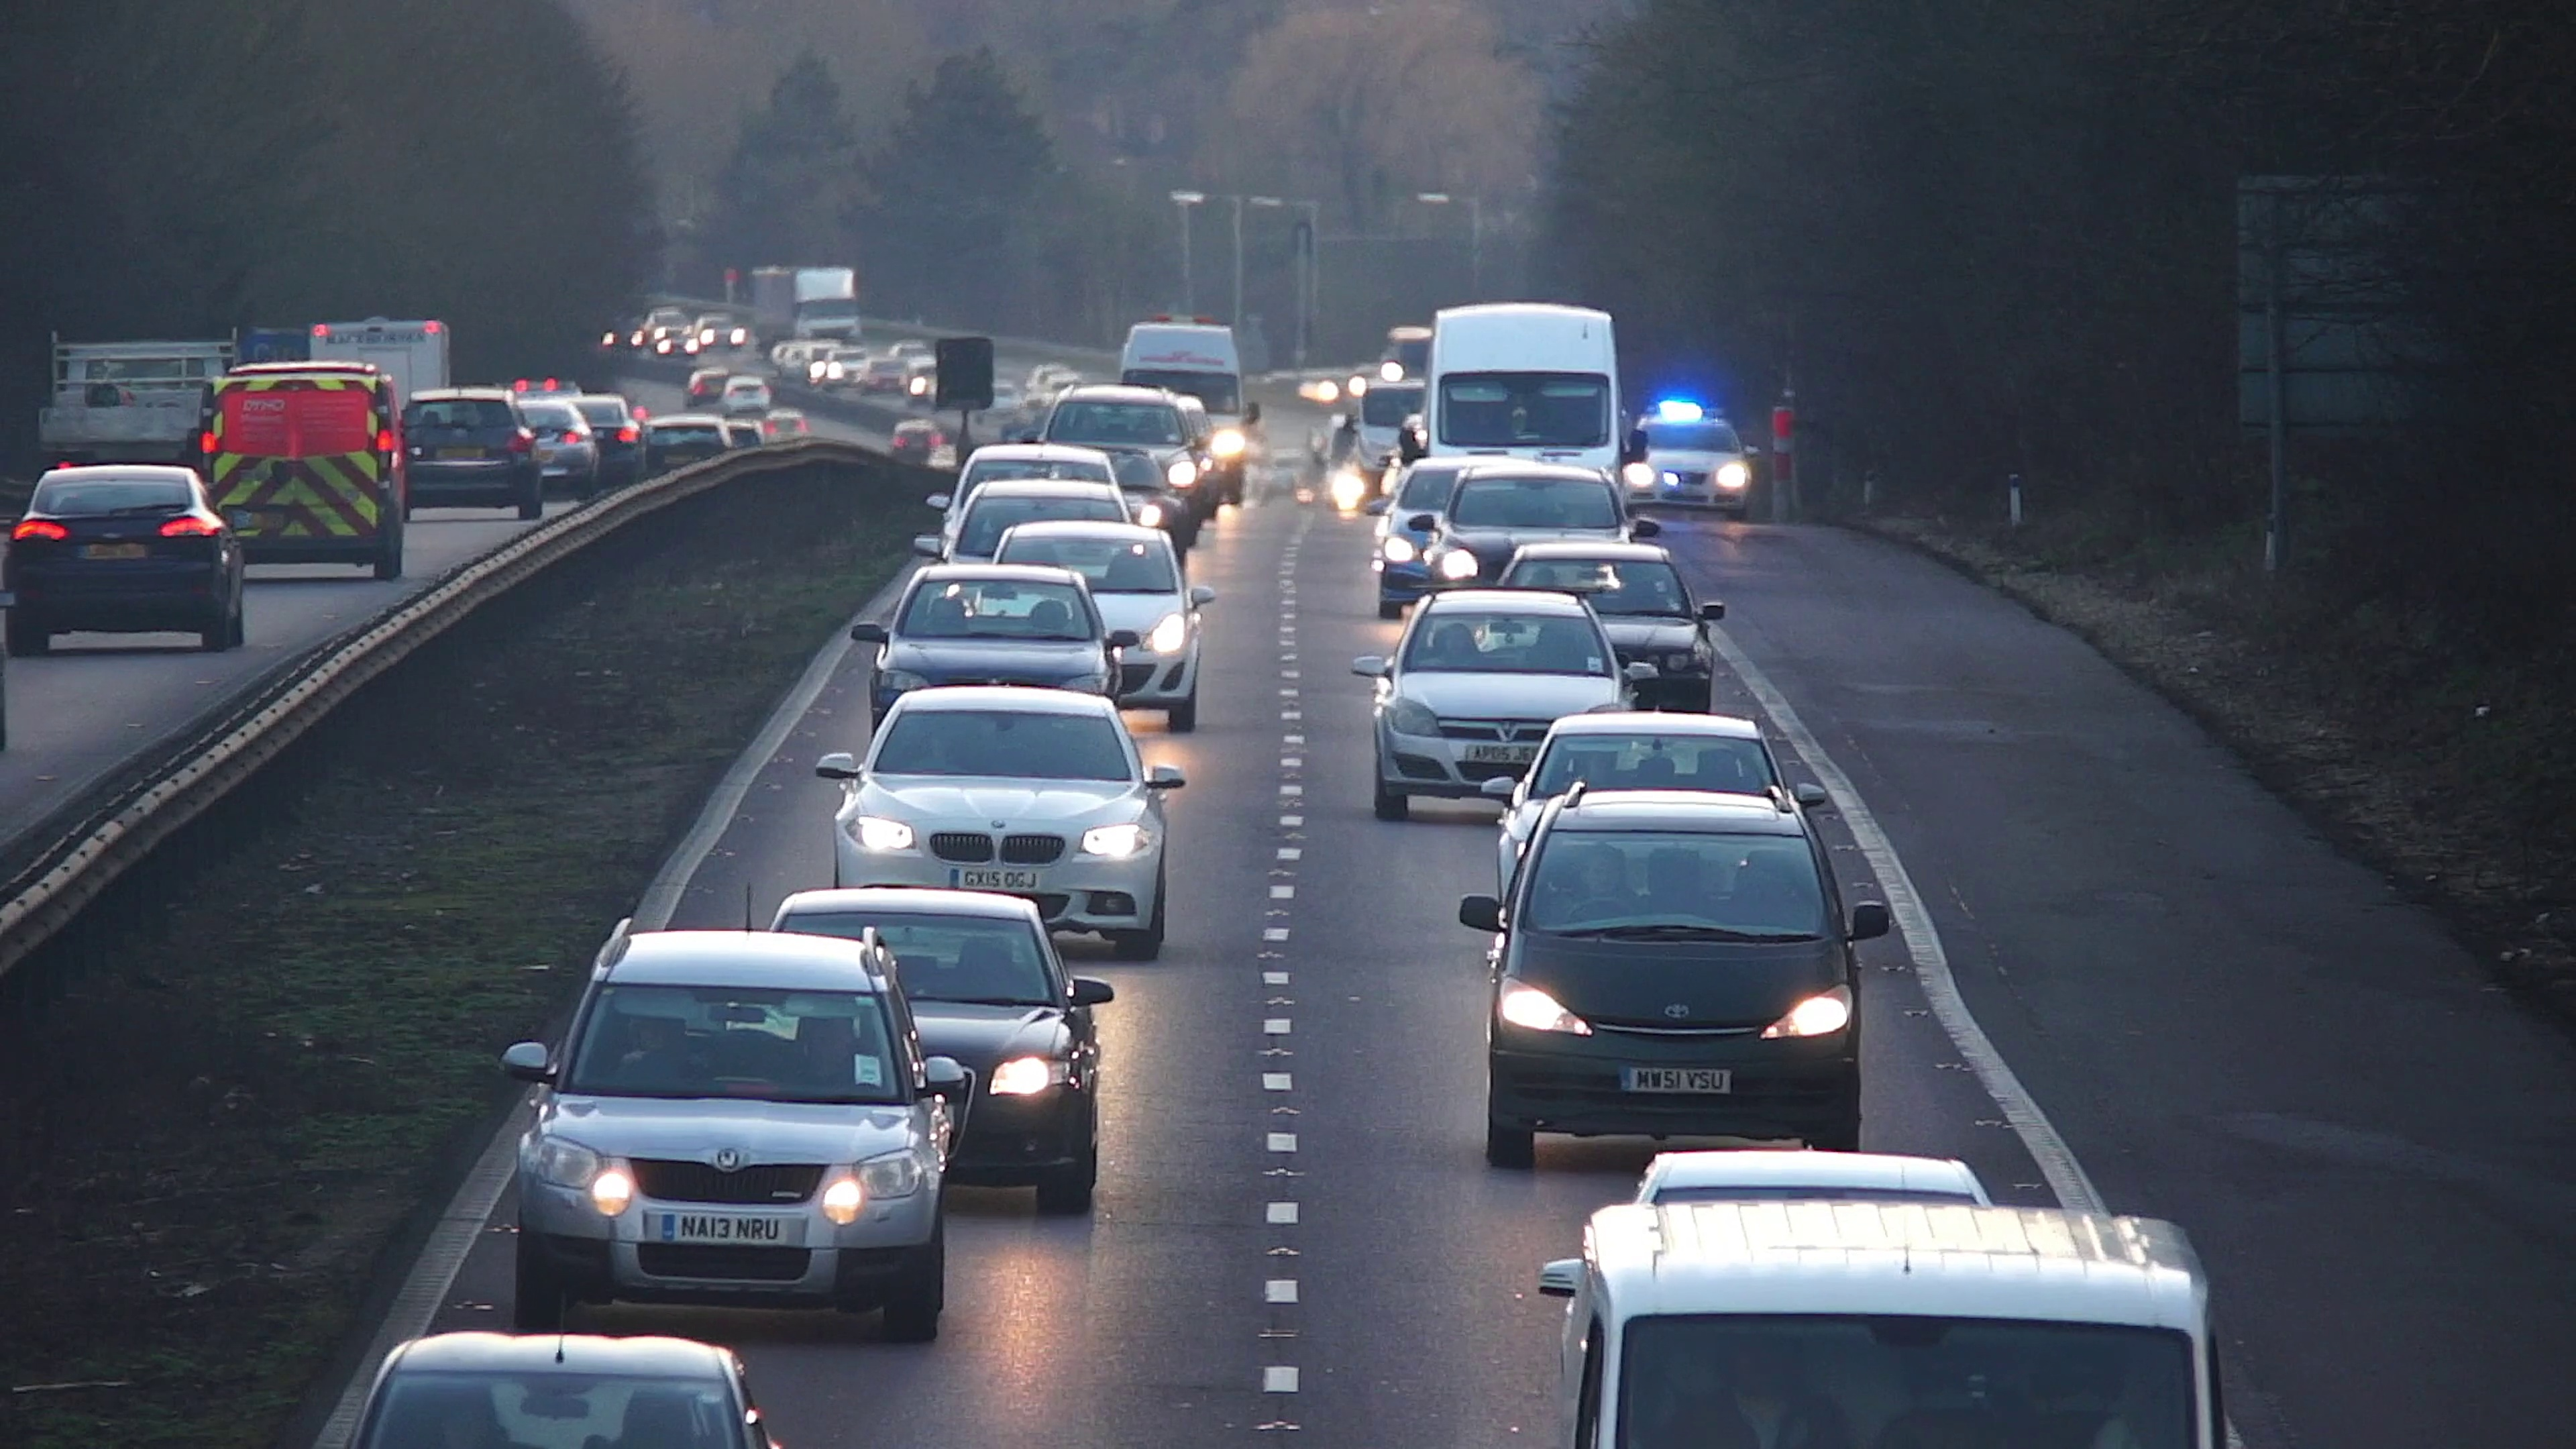

In [9]:
file_path = current_working_directory + '\\last_Img.jpg'
frame = cv2.imread(file_path)
display(Image.open(file_path))

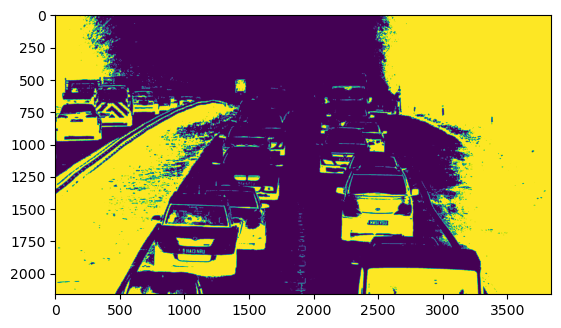

In [13]:
license_plate_crop = frame
license_plate_crop_gray = cv2.cvtColor(license_plate_crop, cv2.COLOR_BGR2GRAY)
_, license_plate_crop_thresh = cv2.threshold(license_plate_crop_gray, 64, 255, cv2.THRESH_BINARY_INV)

plt.imshow(license_plate_crop_thresh)
plt.show()

In [16]:
license_plate_text, license_plate_text_score = read_license_plate(license_plate_crop_thresh)
print(license_plate_text)

None


In [3]:
from IPython.display import Video

Video("mini.mp4")

In [4]:
from ultralytics import YOLO
import cv2

import util
from sort.sort import *
from util import get_car, read_license_plate, write_csv
results = {}

In [8]:


mot_tracker = Sort()

# load models
coco_model = YOLO('yolov8n.pt')
license_plate_detector = YOLO('license_plate_detector.pt')

# load video
cap = cv2.VideoCapture('./mini.mp4')

vehicles = [2, 3, 5, 7]

# read frames
frame_nmr = -1
ret = True
while ret:
    frame_nmr += 1
    ret, frame = cap.read()
    if ret:
        results[frame_nmr] = {}
        # detect vehicles
        detections = coco_model(frame)[0]
        detections_ = []
        for detection in detections.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = detection
            if int(class_id) in vehicles:
                detections_.append([x1, y1, x2, y2, score])

        # track vehicles
        track_ids = mot_tracker.update(np.asarray(detections_))

        # detect license plates
        license_plates = license_plate_detector(frame)[0]
        for license_plate in license_plates.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = license_plate

            # assign license plate to car
            xcar1, ycar1, xcar2, ycar2, car_id = get_car(license_plate, track_ids)

            if car_id != -1:
                #cv2.imwrite('last_Img.jpg', frame)

                # crop license plate
                license_plate_crop = frame[int(y1):int(y2), int(x1): int(x2), :]
                

                # process license plate
                license_plate_crop_gray = cv2.cvtColor(license_plate_crop, cv2.COLOR_BGR2GRAY)
                _, license_plate_crop_thresh = cv2.threshold(license_plate_crop_gray, 64, 255, cv2.THRESH_BINARY_INV)

                # read license plate number
                license_plate_text, license_plate_text_score = read_license_plate(license_plate_crop_thresh)

                if license_plate_text is not None:
                    cv2.imwrite(license_plate_text + '_crop_Img.jpg', license_plate_crop)
                    results[frame_nmr][car_id] = {'car': {'bbox': [xcar1, ycar1, xcar2, ycar2]},
                                                  'license_plate': {'bbox': [x1, y1, x2, y2],
                                                                    'text': license_plate_text,
                                                                    'bbox_score': score,
                                                                    'text_score': license_plate_text_score}}

# write results
write_csv(results, './test.csv')


0: 384x640 21 cars, 1 bus, 2 trucks, 101.7ms
Speed: 3.0ms preprocess, 101.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license_plates, 79.8ms
Speed: 3.0ms preprocess, 79.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 21 cars, 1 bus, 2 trucks, 100.7ms
Speed: 5.0ms preprocess, 100.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license_plates, 90.8ms
Speed: 3.0ms preprocess, 90.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 22 cars, 1 bus, 2 trucks, 82.8ms
Speed: 3.0ms preprocess, 82.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license_plates, 122.7ms
Speed: 4.0ms preprocess, 122.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 23 cars, 1 bus, 1 truck, 88.8ms
Speed: 3.0ms preprocess, 88.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license_pla

{'car': {'bbox': [376.562744140625, 684.9094848632812, 715.19580078125, 991.194580078125]}, 'license_plate': {'bbox': [487.4551696777344, 876.7520751953125, 600.0199584960938, 925.8853149414062], 'text': 'MA13MRU', 'bbox_score': 0.5631437301635742, 'text_score': 0.20440581662836854}}
{'car': {'bbox': [376.5103505913953, 684.8713811331531, 715.4462031158114, 991.4578810398368]}, 'license_plate': {'bbox': [487.5062255859375, 876.9065551757812, 599.9739990234375, 925.9279174804688], 'text': 'MA13MRU', 'bbox_score': 0.5634873509407043, 'text_score': 0.26911548468445423}}
{'car': {'bbox': [374.07826999949447, 689.1047451758109, 713.2798505142812, 997.3628068858573]}, 'license_plate': {'bbox': [485.7444152832031, 888.1051025390625, 594.9392700195312, 931.9484252929688], 'text': 'HA13NRU', 'bbox_score': 0.5364274978637695, 'text_score': 0.5544184759329625}}
{'car': {'bbox': [371.47051306943945, 694.0174364024402, 713.8221288216337, 1005.2590793650744]}, 'license_plate': {'bbox': [479.00326538

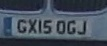

None


In [6]:
file_path = current_working_directory + '\\crop_Img.jpg'
frame = cv2.imread(file_path)
license_plate_crop = frame
display(Image.open(file_path))

license_plate_crop_gray = cv2.cvtColor(license_plate_crop, cv2.COLOR_BGR2GRAY)
_, license_plate_crop_thresh = cv2.threshold(license_plate_crop_gray, 64, 255, cv2.THRESH_BINARY_INV)

plt.imshow(license_plate_crop_gray)


plt.imshow(license_plate_crop_thresh)
plt.show()
# read license plate number
license_plate_text, license_plate_text_score = read_license_plate(license_plate_crop_thresh)
print(license_plate_text)